# High-order Kalman filter

## Introduction
This notebook shows the difference between a high-order Kalman filter, the matrix of which is calculated using the output published in the article [], and a 2-order filter in the presence of gaps in the signal.

Table of contents:
- [Introduction](#introduction)
- [Importing libraries](#importing-libraries)
- [Generating data](#generating-data)
- [Plotting data](#plotting-data)
- [Calculating filters for the generated signal](#calculating-filters)
- [Restoring the signal](#restoring-the-signal)
- [Results](#conclusion)



## Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from StatTools.generators.kasdin_generator import KasdinGenerator
from StatTools.filters.kalman_filter import FractalKalmanFilter
from StatTools.analysis.dfa import DFA
from StatTools.experimental.augmentation.perturbations import add_poisson_gaps

## Generating data

In [2]:
h = 0.8
TRJ_LEN = 2**14

In [3]:
generator = KasdinGenerator(h, length=TRJ_LEN)
generated_signal = generator.get_full_sequence()
gaps_signal, gaps = add_poisson_gaps(generated_signal, 0.2, 2.0)

## Plotting data

In [4]:
axis_fontsize = 14
label_fontsize = 14
legend_fontsize = 14
title_fontsize = 16

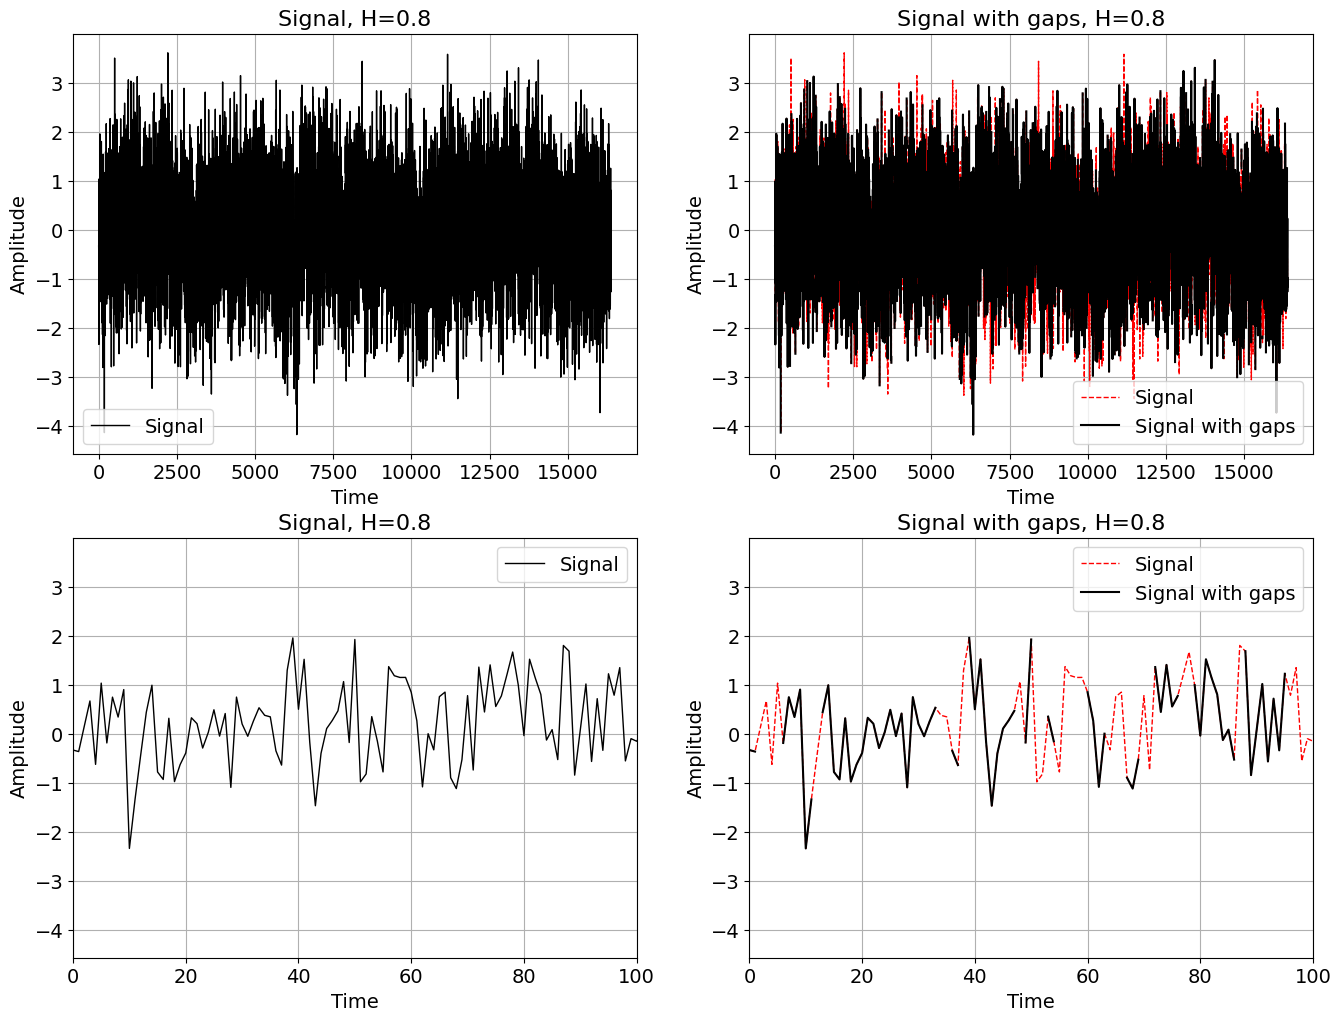

In [5]:
plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
plt.plot(generated_signal, label="Signal", color="black", linewidth=1)
plt.xlabel("Time", fontsize=axis_fontsize)
plt.ylabel("Amplitude", fontsize=axis_fontsize)
plt.legend(fontsize=legend_fontsize)
plt.tick_params(labelsize=label_fontsize)
plt.grid(True)
plt.title(f"Signal, H={h}", fontdict={"fontsize": title_fontsize})

plt.subplot(2, 2, 2)
plt.plot(
    generated_signal,
    label="Signal",
    color="red",
    linestyle="--",
    linewidth=1,
)
plt.plot(gaps_signal, label="Signal with gaps", color="black")
plt.xlabel("Time", fontsize=axis_fontsize)
plt.ylabel("Amplitude", fontsize=axis_fontsize)
plt.legend(fontsize=legend_fontsize)
plt.tick_params(labelsize=label_fontsize)
plt.grid(True)
plt.title(f"Signal with gaps, H={h}", fontdict={"fontsize": title_fontsize})

plt.subplot(2, 2, 3)
plt.plot(generated_signal, label="Signal", color="black", linewidth=1)
plt.xlabel("Time", fontsize=axis_fontsize)
plt.ylabel("Amplitude", fontsize=axis_fontsize)
plt.legend(fontsize=legend_fontsize)
plt.tick_params(labelsize=label_fontsize)
plt.xlim(0, 100)
plt.grid(True)
plt.title(f"Signal, H={h}", fontdict={"fontsize": title_fontsize})

plt.subplot(2, 2, 4)
plt.plot(
    generated_signal,
    label="Signal",
    color="red",
    linestyle="--",
    linewidth=1,
)
plt.plot(gaps_signal, label="Signal with gaps", color="black")
plt.xlabel("Time", fontsize=axis_fontsize)
plt.ylabel("Amplitude", fontsize=axis_fontsize)
plt.legend(fontsize=legend_fontsize)
plt.tick_params(labelsize=label_fontsize)
plt.grid(True)
plt.xlim(0, 100)
plt.title(f"Signal with gaps, H={h}", fontdict={"fontsize": title_fontsize})
plt.show()


## Calculating filters for the generated signal

Init filters and configure them with the generated signala nd noise. 

(Note that we have the signal with gaps noise is not used in the filter and equal to None)

In [ ]:
noise = np.zeros(TRJ_LEN)

second_order_filter = FractalKalmanFilter(dim_x=2, dim_z=1)
second_order_filter.auto_configure(generated_signal, noise)

third_order_filter = FractalKalmanFilter(dim_x=3, dim_z=1)
third_order_filter.auto_configure(generated_signal, noise)

high_order_filter = FractalKalmanFilter(dim_x=7, dim_z=1)
high_order_filter.auto_configure(generated_signal, noise)

## Restoring the signal

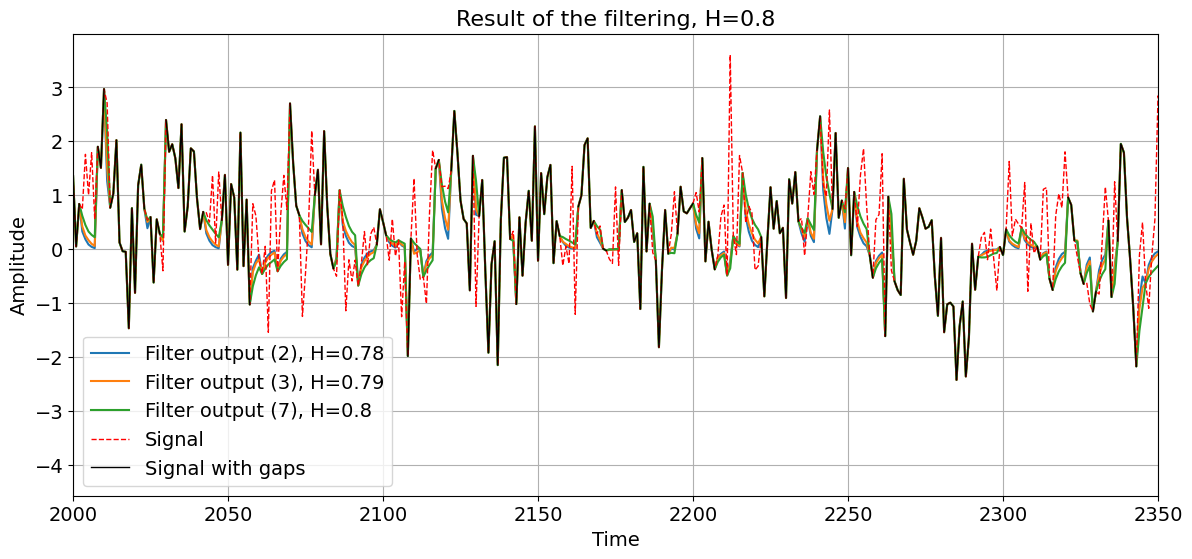

In [8]:
plt.figure(figsize=(14, 6))
for f in [second_order_filter, third_order_filter, high_order_filter]:
    recovered_signal = np.zeros(TRJ_LEN)
    for k in range(1, TRJ_LEN):
        f.predict()
        if not np.isnan(gaps_signal[k]):
            f.update(gaps_signal[k])
        recovered_signal[k] = f.x[0].item()
    dfa = DFA(recovered_signal)
    rec_h = dfa.find_h()
    plt.plot(recovered_signal, label=f"Filter output ({f.dim_x}), H={round(rec_h, 2)}")

plt.plot(
    generated_signal,
    label="Signal",
    color="red",
    linestyle="--",
    linewidth=1,
)
plt.plot(gaps_signal, label="Signal with gaps", color="black", linewidth=1)
plt.xlim(2000, 2350)
plt.xlabel("Time", fontsize=axis_fontsize)
plt.ylabel("Amplitude", fontsize=axis_fontsize)
plt.legend(fontsize=legend_fontsize)
plt.tick_params(labelsize=label_fontsize)
plt.grid(True)
plt.title(f"Result of the filtering, H={h}", fontdict={"fontsize": title_fontsize})
plt.show()